# BiSpectral Representation Method
Author: Lohit Vandanapu
Date: August 19, 2018

In this example, the BiSpectral Representation Method is used to generate stochastic processes from a prescribed Power Spectrum and associated Bispectrum. This example illustrates how to use the BSRM class for 'n' dimensional case and compare the statistics of the generated stochastic processes with the expected values.

Import the necessary libraries. Here we import standard libraries such as numpy and matplotlib, but also need to import the BSRM class from the StochasticProcesses module of UQpy.

In [1]:
from UQpy.StochasticProcess import BSRM
import numpy as np
from scipy.stats import skew
import matplotlib.pyplot as plt
from copy import deepcopy
plt.style.use('seaborn')

The input parameters necessary for the generation of the stochastic processes are given below:

In [2]:
# Input parameters

n_sim = 1000  # Num of samples
dim = 2
n = 1  # Num of dimensions

T = 20  # Time(1 / T = dw)
nt = 128  # Num.of Discretized Time
F = 1 / T * nt / 2  # Frequency.(Hz)
nf = 64  # Num of Discretized Freq.

# # Generation of Input Data(Stationary)
dt = T / nt
t = np.linspace(0, T - dt, nt)
df = F / nf
f = np.linspace(0, F - df, nf)

f_list = [f for _ in range(dim)]
F_P = np.array(np.meshgrid(*f_list, indexing='ij'))
P = 20 / np.sqrt(2 * np.pi) * np.exp(-1/2 * np.linalg.norm(F_P, axis=0) ** 2)

F_B = np.meshgrid(*[*f_list, *f_list])
b = 40 / (2 * np.pi) * np.exp(2 * (-1/2 * np.linalg.norm(F_B, axis=0) ** 2))
B_Real = deepcopy(b)
B_Imag = deepcopy(b)

B_Real[0, :, :, :] = 0
B_Real[:, 0, :, :] = 0
B_Real[:, :, 0, :] = 0
B_Real[:, :, :, 0] = 0
B_Imag[0, :, :, :] = 0
B_Imag[:, 0, :, :] = 0
B_Imag[:, :, 0, :] = 0
B_Imag[:, :, :, 0] = 0

B_Complex = B_Real + 1j * B_Imag

Make sure that the input parameters are in order to prevent aliasing

In [3]:
t_u = 2*np.pi/2/F

if dt>t_u:
    print('Error')

Defining the Power Spectral Density Function

In [4]:
BSRM_object = BSRM(n_sim, P, B_Complex, [dt, dt], [df, df], [nt, nt], [nf, nf])
samples = BSRM_object.samples

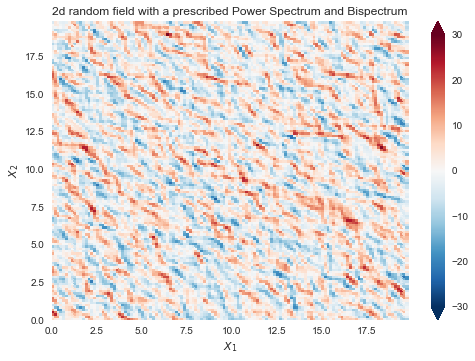

In [5]:
# fig, ax = plt.subplots()
# plt.title('Realisation of the Spectral Representation Method')
# plt.plot(t, samples[0])
# ax.yaxis.grid(True)
# ax.xaxis.grid(True)
# plt.show()

from pylab import *
t_list = [t for _ in range(dim)]
T = np.array(np.meshgrid(*t_list, indexing='ij'))

fig1 = plt.figure()
plt.title('2d random field with a prescribed Power Spectrum and Bispectrum')
pcm = pcolor(T[0], T[1], samples[0, 0], cmap='RdBu_r', vmin=-30, vmax=30)
plt.colorbar(pcm, extend='both', orientation='vertical')
plt.xlabel('$X_{1}$')
plt.ylabel('$X_{2}$')
plt.show()


In [6]:
print('The mean of the samples is ', np.mean(samples), 'whereas the expected mean is 0.000')
print('The variance of the samples is ', np.var(samples), 'whereas the expected variance is ', 4 * np.sum(P)*df**2)
print('The skewness of the samples is ', np.mean(skew(samples, axis=0)), 'whereas the expected skewness is ', 9 * np.sum(B_Real)*df**4/(4 * np.sum(P)*df**2)**(3/2))

The mean of the samples is  -0.0035079708259868176 whereas the expected mean is 0.000
The variance of the samples is  51.995931919050435 whereas the expected variance is  51.9995689650598
The skewness of the samples is  0.08412435075351446 whereas the expected skewness is  0.0840583275725642
